# K-Means algorithm on two different datasets

In [30]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

## Iris Dataset

In [15]:
data = pd.read_csv('Iris.csv')

In [29]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


### Heatmap

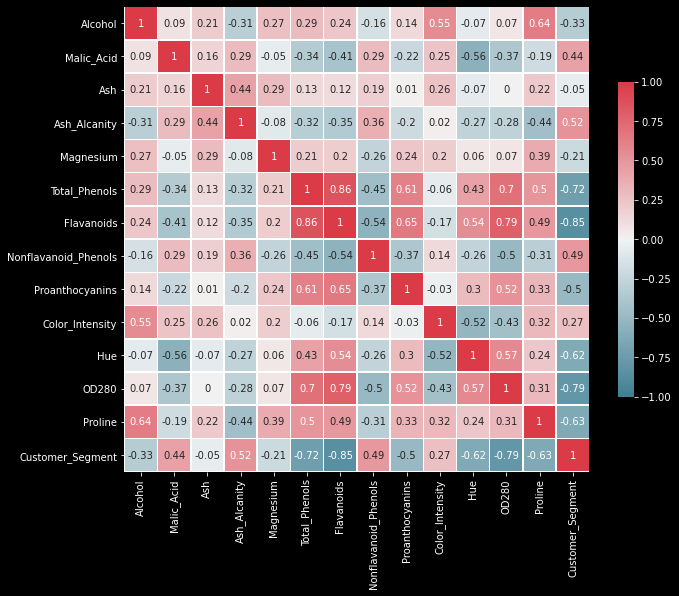

In [31]:
#generate the corelation matrix 
corr=data.corr().round(2)
#mask for the upper triangle
mask=np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]
# Set figure size
f, ax = plt.subplots(figsize=(10, 10))

#define custom colormap
cmap=sns.diverging_palette(220,10, as_cmap=True)

#draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()
plt.savefig("heatmap.png")

In [16]:
x1 = data.iloc[:, [1, 2, 3, 4]].values

## Model

In [17]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4, init='random',n_init=30, max_iter=300, tol=1e-04, random_state=42)
y1 = km.fit_predict(x1)

## New points introduced to check k-means Model

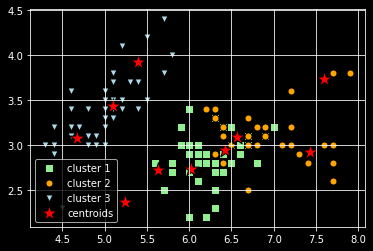

In [28]:
plt.scatter(
    x1[y1 == 0, 0], x1[y1 == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)
plt.scatter(
    x1[y1 == 1, 0], x1[y1 == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
plt.scatter(
    x1[y1 == 2, 0], x1[y1 == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)


# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.savefig("clusters_for-iris.png")
plt.show()

### calculate distortion for a range of number of cluster

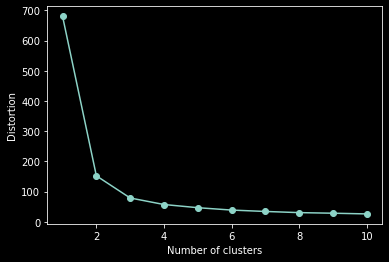

In [27]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x1)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.savefig("distortion_iris.png")
plt.show()

## Wine Dataset

### Loading dataset

In [20]:
data = pd.read_csv('wine.csv')

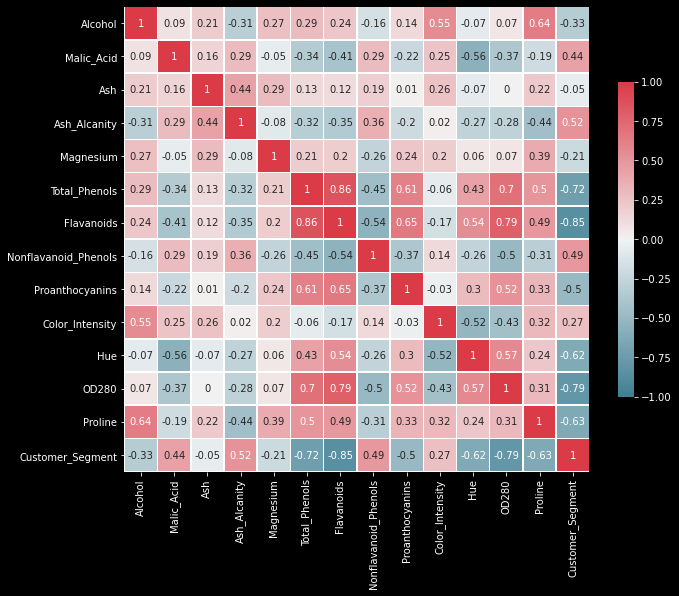

In [32]:
#generate the corelation matrix 
corr=data.corr().round(2)
#mask for the upper triangle
mask=np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]
# Set figure size
f, ax = plt.subplots(figsize=(10, 10))

#define custom colormap
cmap=sns.diverging_palette(220,10, as_cmap=True)

#draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()
plt.savefig("heatmap2.png")

In [21]:
x2 = data.iloc[:, [1, 2, 3, 4]].values

In [22]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init='random',n_init=20, max_iter=400, tol=1e-04, random_state=4)
y2 = km.fit_predict(x2)

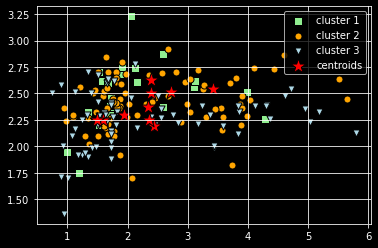

In [25]:
plt.scatter(
    x2[y2 == 0, 0], x2[y2 == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)
plt.scatter(
    x2[y2 == 1, 0], x2[y2 == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
plt.scatter(
    x2[y2 == 2, 0], x2[y2 == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)


# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.savefig("for-wine-dataset.png")
plt.show()

### calculate distortion for a range of number of cluster

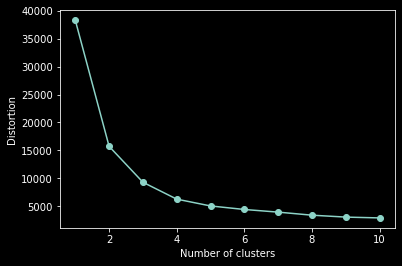

In [26]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(x2)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.savefig("wine_distortion.png")
plt.show()

# END